In [13]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set({"figure.figsize":(17,8)})
sns.set(font_scale = 1.15)



In [14]:
a = pd.read_csv("../../Raw Data/Oscars.csv",encoding = "ISO-8859-1")

In [15]:
#Seleccionamos las columnas que nos interesan
selected_columns = a[["person","movie","year_of_award","birthplace","date_of_birth"]]
df = selected_columns.copy()
df.head(3)

,person,movie,year_of_award,birthplace,date_of_birth
0,Lewis Milestone,Two Arabian Knights,1927,"Chisinau, Moldova",30-Sep-1895
1,Frank Lloyd,The Divine Lady,1930,"Glasgow, Scotland",2-Feb-1886
2,Lewis Milestone,All Quiet on the Western Front,1931,"Chisinau, Moldova",30-Sep-1895


In [16]:
df.shape

(441, 5)

In [17]:
df = df.drop_duplicates(subset='person', keep="last")

In [18]:
df.shape

(348, 5)

In [19]:
df = df.drop(df[df.date_of_birth == "18-Aug-1936 [1]"].index)

In [20]:
df['year'] = pd.DatetimeIndex(df['date_of_birth']).year
df['month'] = pd.DatetimeIndex(df['date_of_birth']).month
df['day'] = pd.DatetimeIndex(df['date_of_birth']).day
df.head(3)

,person,movie,year_of_award,birthplace,date_of_birth,year,month,day
2,Lewis Milestone,All Quiet on the Western Front,1931,"Chisinau, Moldova",30-Sep-1895,1895,9,30
3,Norman Taurog,Skippy,1932,"Chicago, Il",23-Feb-1899,1899,2,23
4,Frank Borzage,Bad Girl,1933,"Salt Lake City, Ut",23-Apr-1894,1894,4,23


In [21]:
df = df.loc[df["year_of_award"] > 1965]

In [22]:
def trimestres(row):
    if row['month'] < 4 :
        return 1
    elif row['month'] < 7:
        return 2
    elif row['month'] < 10:
        return 3
    else:
        return 4  

In [23]:
df['trimestre'] = df.apply (lambda month: trimestres(month), axis=1)

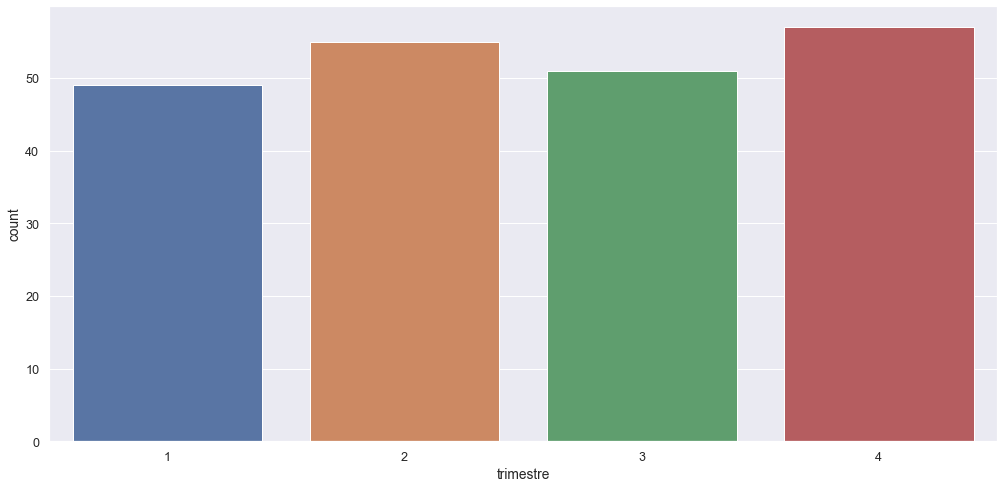

In [24]:
ax = sns.countplot(x="trimestre", data=df)

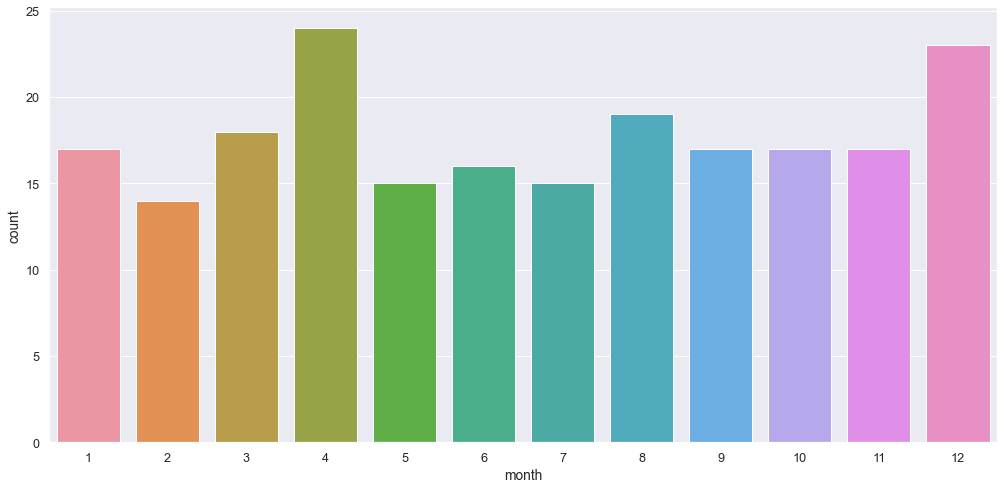

In [25]:
ax = sns.countplot(x="month", data=df)